In [168]:
# Import library
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import hvplot.pandas

In [169]:
html_text = requests.get('https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart').text

In [170]:
soup = BeautifulSoup(html_text, 'lxml')
div = soup.find('div', class_ = 'col-xs-9', style="margin-bottom:200px;")
div_1 = div.find(id="style-1")
tb = div_1.find('table', class_ = 'table')
gold_price = tb.find('tbody')

Year = []
Price = []

for row in gold_price.find_all('tr'):    
    Year.append((row.find(style ="text-align:center").text))
    Price.append((row.find(style ="text-align:center;").text))

gold = pd.DataFrame(data = {'Year' : Year, 'Gold Price' : Price}, columns=['Year', 'Gold Price'])
gold = gold.set_index(['Year']).sort_index()

In [171]:
gold["Gold Price"] = gold["Gold Price"].str.replace("$", "")

/home/qian/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [172]:
gold["Gold Price"] = gold["Gold Price"].str.replace(",", "").astype(float)

In [173]:
gold = gold.sort_index(ascending=False)
gold.dtypes

Gold Price    float64
dtype: object

In [174]:
gold.hvplot.line(
    x="Year",
    ylabel="Price",
    xlabel="Year",
    label="Gold Price 1969 - 2022",
    rot=45,
    width=800,
    height=600
)

:Curve   [Year]   (Gold Price)

In [175]:
inf_url = "https://www.rateinflation.com/inflation-rate/australia-historical-inflation-rate/"
inflation_df = pd.read_html(inf_url)
inflation_df = inflation_df[0]

In [176]:
inflation_df = inflation_df.set_index("Year")
inflation_df["Annual"] = inflation_df["Annual"].str.replace("%", "").astype(float)
inflation_df = inflation_df["Annual"]
inflation_df = inflation_df.iloc[0:54]
inflation_df

Year
2022     NaN
2021     2.9
2020     0.8
2019     1.6
2018     1.9
2017     1.9
2016     1.3
2015     1.5
2014     2.5
2013     2.4
2012     1.8
2011     3.3
2010     2.9
2009     1.8
2008     4.4
2007     2.3
2006     3.6
2005     2.7
2004     2.3
2003     2.7
2002     3.0
2001     4.4
2000     4.5
1999     1.5
1998     0.9
1997     0.2
1996     2.6
1995     4.6
1994     2.0
1993     1.8
1992     1.0
1991     3.2
1990     7.3
1989     7.5
1988     7.2
1987     8.5
1986     9.1
1985     6.7
1984     4.0
1983    10.0
1982    11.4
1981     9.5
1980    10.1
1979     9.1
1978     8.0
1977    12.3
1976    13.3
1975    15.2
1974    15.4
1973     9.1
1972     6.0
1971     6.1
1970     3.4
1969     3.3
Name: Annual, dtype: float64

In [177]:
inflation_plot = inflation_df.hvplot()

In [178]:
gold.index

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987',
       '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978',
       '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970', '1969'],
      dtype='object', name='Year')

In [179]:
inflation_df.hvplot(label = 'inflation') * gold.hvplot(label = 'gold')

:Overlay
   .Curve.Inflation :Curve   [Year]   (Annual)
   .Curve.Gold      :Curve   [Year]   (Gold Price)

In [180]:
inflation_df = pd.DataFrame(inflation_df)

Text(0, 0.5, 'Gold Price')

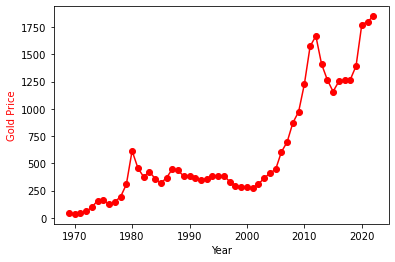

In [187]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(gold.index, gold['Gold Price'], marker = 'o', color = 'red')
ax.set_xlabel("Year")
ax.set_ylabel("Gold Price", color = 'red')

In [188]:
gold.index = pd.to_numeric(gold.index)

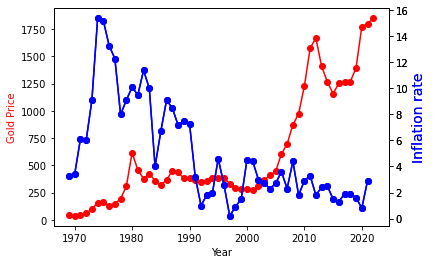

In [226]:
ax2=ax.twinx()
ax2.plot(inflation_df.index, inflation_df["Annual"], color="blue", marker="o")
ax2.set_ylabel("Inflation rate", color="blue", fontsize=14)
plt.show()
fig

In [227]:
inflation_df

,Annual
Year,
2022,NaN
2021,2.9
2020,0.8
2019,1.6
2018,1.9
2017,1.9
2016,1.3
2015,1.5
2014,2.5


In [228]:
gold

,Gold Price
Year,
2022,1849.86
2021,1798.89
2020,1773.73
2019,1393.34
2018,1268.93
2017,1260.39
2016,1251.92
2015,1158.86
2014,1266.06


In [266]:
inflation_slice = inflation_df.loc[1980:1969].sort_index(ascending = True)
gold_slice = gold.loc[1980:1969].sort_index(ascending = True)
correlation = inflation_slice['Annual'].corr(gold_slice['Gold Price'])
correlation

0.3078201537623247

In [315]:
inflation_slice1 = inflation_slice.pct_change()
gold_slice1 = gold_slice.pct_change()
gold_slice

,Gold Price
Year,
1969,41.10
1970,35.96
1971,40.80
1972,58.17
1973,97.12
1974,158.76
1975,160.87
1976,124.80
1977,147.84


In [316]:
import numpy as np
from scipy.stats import multivariate_normal

mean_inflation = np.mean(inflation_slice1['Annual'])
mean_gold = np.mean(gold_slice1['Gold Price'])

std_inflation = np.std(inflation_slice1['Annual'], ddof = 1)
std_gold = np.std(gold_slice1['Gold Price'], ddof = 1)

In [329]:
# Generate sales and growth rate for 10 periods
# Using a multivariate normal distribution
cov_matrix = [[(std_inflation**2), correlation*(std_inflation*std_gold)], [correlation*(std_inflation*std_gold), (std_gold**2)]]

distribution = multivariate_normal(
mean = [mean_inflation, mean_gold],
cov = cov_matrix
)

sample_data = distribution.rvs(5, random_state=5)

inflation_growth = sample_data[:, 0]
gold_growth = sample_data[:, 1]

inflation_future = np.cumprod([inflation_df['Annual'].loc[2021]]+list(inflation_growth))
gold_future = np.cumprod([gold['Gold Price'].loc[2022]]+list(gold_growth))

gold_growth

array([ 0.1219435 , -0.49480182,  0.60937633,  0.49918968,  0.20277008])

In [330]:
gold['Gold Price'].loc[2022]

1849.86

In [331]:
# Prepare dataframe
growth_df = pd.DataFrame(data = {
'Growth Rate - Inflation': inflation_growth,
'Growth Rate - Gold' : gold_growth
})

future_df = pd.DataFrame(data = {
'Future Inflation Rate': inflation_future,
'Future Gold': gold_future
})

future_df


,Future Inflation Rate,Future Gold
0,2.900000,1849.860000
1,0.317532,225.578405
2,-0.144928,-111.616604
3,0.034827,-68.016517
4,0.018856,-33.953143
5,0.003377,-6.884681
